# Titanic - Machine Learning from Disaster

We took this Dataset from Kaggle.It has the information about different passengers on tintanic ship and thier survival. We have following features in our dataset -
* survival -> Survival -> 0 = No, 1 = Yes
* pclass -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
* sex -> Sex	
* Age -> Age in years	
* sibsp -> # of siblings / spouses aboard the Titanic	
* parch -> # of parents / children aboard the Titanic	
* ticket -> Ticket number	
* fare -> Passenger fare	
* cabin -> Cabin number	
* embarked -> Port of Embarkation

## Data Loading and Imports

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visulization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Data Loading
Lets load our data take a look on our sample data

In [39]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Sex Feature Analysis

- Lets start from basic we can have a look if survival rate is different from Males and Feamles on the ship

In [23]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)


% of women who survived: 0.7420382165605095


In [24]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


- As we can see Feamles survival rate is more and it can be a good feature for our model

## Fare Feature analsyis

- First We can look if we have any missing values for Fare in our dataset
- Then if we have any Missing value, we can impute those values
- Lastly We can make a box plot to look how our surival chnages with Fare 

### Fare missing value analysis

In [25]:
print(f'missing fare values in train data {train_data.Fare.isna().sum()}')
print(f'missing fare values in test data {test_data.Fare.isna().sum()}')

missing fare values in train data 0
missing fare values in test data 1


### Fare missing value imputation

In [26]:
test_data.Fare[test_data.Fare.isna()] = train_data.Fare.median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Fare value vs surviaval Box plot
We can look at the box plot if we have difference in different mean of fares for passengers who had survived or not survived.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

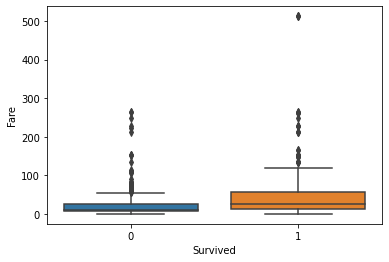

In [42]:
sns.boxplot('Survived','Fare',data=train_data)


As we can See the survived passengers fare mean is higher than passenger who didn't survived so we can say it can be a good feature for our model.

## Age Feature Analysis

- First We can look if we have any missing values for Fare in our dataset
- We can make a box plot to look how our surival chnages with Fare
- Then if we hav any Missing value we can impute those values

### Age Missing value Analysis

In [28]:
print(f'missing fare values in train data {train_data.Age.isna().sum()}')
print(f'missing fare values in test data {test_data.Age.isna().sum()}')

missing fare values in train data 177
missing fare values in test data 86


### Age value vs surviaval Box plot
We can look at the box plot if we have difference in mean of Age for passengers who had survived or not survived.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='Age'>

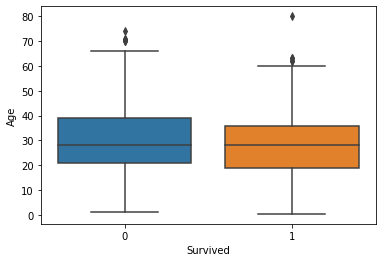

In [43]:
sns.boxplot('Survived','Age',data=train_data)

As We can there is only slight difference beetween mean age of passengers on basis of the survival. But still be can keep it in our model if it can be useful with other features.

### Imputing missing values

In [44]:
train_data['Age'].fillna(-1,inplace=True)
test_data['Age'].fillna(-1,inplace=True)

## Cabin Letter Feature

Here different Cabin can be unified by thier cabin letters. We can experiment to add this information as feature for our model.

In [45]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Feature generation

In [32]:
train_data['Cabin_letter'] = train_data.Cabin.apply(lambda x:x[0] if type(x) != float else "N/A")
test_data['Cabin_letter'] = test_data.Cabin.apply(lambda x:x[0] if type(x) != float else "N/A")

In [33]:
train_data.Cabin_letter.value_counts()

N/A    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin_letter, dtype: int64

### Cabin letter vs Survival

We can build a box plot to know if survival is somehow directly related to our Cabbin letter Information or not.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin_letter', ylabel='Survived'>

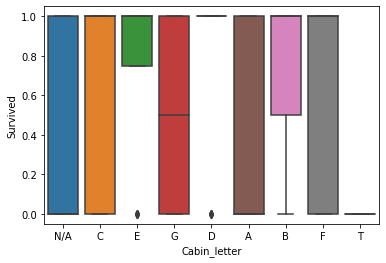

In [34]:
sns.boxplot('Cabin_letter','Survived',data=train_data)

Cabin E,D and B can be a signal for survival.

## Model training and Predcition

__We are using a random forest model here and the idea is inspired by this [post](https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook) on kaggle. We had used following feature in our final model -__

* pclass
* sex 
* Age 
* sibsp 
* parch 
* fare 
* embarked 

In [35]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#Fare feature
X[['Fare','Age']] = train_data[['Fare','Age']]
X_test[['Fare','Age']] = test_data[['Fare','Age']]

## next code block to handle disparity of columns beetween train and test data taken from https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data
missing_cols = set( X.columns ) - set( X_test.columns )
for c in missing_cols:
    X_test[c] = 0

model = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Other Experiments

We have done follwing experiment but included the model which performed best for us in the above section. In this section we are providing other experiments and thier performance scores.

- Baseline model from [reference tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook) - __0.7751__

- Age and Fare feature added to baseline model - __0.77990__

- Age,Fare, Cabin letter and Embark feature added to baseline model - __0.76794__

- Age,Fare and Embark feature added to baseline model - __0.77990__


### Hyperparameter Tuning

We have Tune our hyperparameters to get our final best model.

- Age,Fare and Embark feature added to baseline model ( Number of trees = 300, Max Depth = 7 ) - __0.78229__
- Age,Fare and Embark feature added to baseline model ( Number of trees = 200, Max Depth = 6 ) - __0.78947__

So at the end we had improved our model from Our Baseline Model from 0.7751 to 0.78947


### References
 - [Kaggle titanic Tutorial Noetbook](https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook)
 - [Seabotn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)